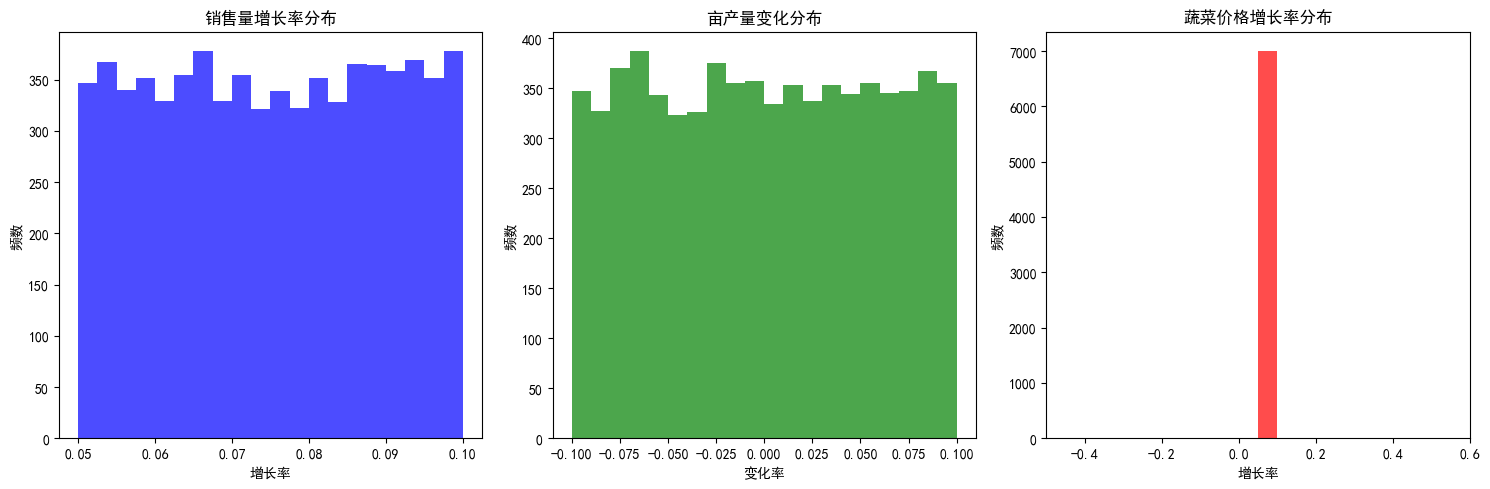

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
land_info = pd.read_excel("D:/pythonproject/data_science/excel_files/附件1.xlsx", sheet_name="乡村的现有耕地")
crop_info = pd.read_excel("D:/pythonproject/data_science/excel_files/附件1.xlsx", sheet_name="乡村种植的农作物")
planting_2023 = pd.read_excel("D:/pythonproject/data_science/excel_files/附件2.xlsx", sheet_name="2023年的农作物种植情况")
stats_2023 = pd.read_excel("D:/pythonproject/data_science/excel_files/附件2.xlsx", sheet_name="2023年统计的相关数据")

# 预处理数据
land_types = land_info[['地块名称', '地块类型', '地块面积/亩']].dropna()
crop_types = crop_info[['作物编号', '作物名称', '作物类型', '种植耕地']].dropna()
planting_2023 = planting_2023[['地块名称', '作物编号', '作物名称', '作物类型', '种植面积/亩', '种植季次']].dropna()
stats_2023 = stats_2023[['作物编号', '作物名称', '地块类型', '种植季次', '亩产量/斤', '种植成本/(元/亩)', '销售单价/(元/斤)']].dropna()

# 定义地块类型和作物类型的映射关系
land_type_mapping = {
    '平旱地': ['粮食'],
    '梯田': ['粮食'],
    '山坡地': ['粮食'],
    '水浇地': ['水稻', '蔬菜'],
    '普通大棚': ['蔬菜', '食用菌'],
    '智慧大棚': ['蔬菜']
}

# 定义经济效益计算函数
def calculate_profit(crop_id, land_type, season, area):
    stats = stats_2023[(stats_2023['作物编号'] == crop_id) & 
                      (stats_2023['地块类型'] == land_type) & 
                      (stats_2023['种植季次'] == season)]
    if stats.empty:
        return 0
    yield_per_mu = stats['亩产量/斤'].values[0]
    cost_per_mu = stats['种植成本/(元/亩)'].values[0]
    price_range = stats['销售单价/(元/斤)'].values[0]
    if '-' in price_range:
        min_price, max_price = map(float, price_range.split('-'))
        price = (min_price + max_price) / 2
    else:
        price = float(price_range)
    revenue = yield_per_mu * price * area
    cost = cost_per_mu * area
    profit = revenue - cost
    return profit

# 定义随机变量模拟函数
def simulate_random_variables(year):
    if year > 2023:
        growth_rate = np.random.uniform(0.05, 0.10)
    else:
        growth_rate = 0
    other_crop_change = np.random.uniform(-0.05, 0.05)
    yield_change = np.random.uniform(-0.10, 0.10)
    cost_growth = 0.05
    vegetable_price_growth = 0.05
    mushroom_price_decline = np.random.uniform(-0.05, -0.01)
    return {
        'growth_rate': growth_rate,
        'other_crop_change': other_crop_change,
        'yield_change': yield_change,
        'cost_growth': cost_growth,
        'vegetable_price_growth': vegetable_price_growth,
        'mushroom_price_decline': mushroom_price_decline
    }

# 定义蒙特卡洛模拟函数
def monte_carlo_simulation(years, num_simulations=1000):
    results = []
    for _ in range(num_simulations):
        simulation_result = {}
        for year in years:
            random_vars = simulate_random_variables(year)
            simulation_result[year] = random_vars
        results.append(simulation_result)
    return results

# 定义敏感性分析函数
def sensitivity_analysis(years, num_simulations=1000):
    # 模拟数据
    simulations = monte_carlo_simulation(years, num_simulations)
    # 提取关键参数
    growth_rates = [sim[year]['growth_rate'] for sim in simulations for year in years]
    yield_changes = [sim[year]['yield_change'] for sim in simulations for year in years]
    price_changes = [sim[year]['vegetable_price_growth'] for sim in simulations for year in years]
    # 绘制敏感性分析图
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(growth_rates, bins=20, color='blue', alpha=0.7)
    plt.title('销售量增长率分布')
    plt.xlabel('增长率')
    plt.ylabel('频数')
    plt.subplot(1, 3, 2)
    plt.hist(yield_changes, bins=20, color='green', alpha=0.7)
    plt.title('亩产量变化分布')
    plt.xlabel('变化率')
    plt.ylabel('频数')
    plt.subplot(1, 3, 3)
    plt.hist(price_changes, bins=20, color='red', alpha=0.7)
    plt.title('蔬菜价格增长率分布')
    plt.xlabel('增长率')
    plt.ylabel('频数')
    plt.tight_layout()
    plt.savefig('sensitivity_analysis.png')
    plt.show()

# 执行敏感性分析
years = list(range(2024, 2031))
sensitivity_analysis(years)